<a href="https://colab.research.google.com/github/aryan-cs/aryan-cs/blob/master/reachable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [913]:
import numpy as np
import matplotlib.pyplot as plt
import random

PI = np.pi
POINT_SIZE = 20

class Ray:
    def __init__(self, start, end, line_segment):
        self.start = start
        self.end = end
        self.color = 'limegreen'
        self.line_segment = line_segment

    def lies_on(self, segment):
      return (segment[0] == self.line_segment[0] and segment[1] == self.line_segment[1]) or (segment[0] == self.line_segment[1] and segment[1] == self.line_segment[0])

    def intersects_with(self, segment):
        return segment_intersection([self.start, self.end], segment)

    def plot(self):
      width = 1
      if self.color == 'red': width = 3
      plt.arrow(self.start[0], self.start[1], self.end[0] - self.start[0], self.end[1] - self.start[1],
                  head_width=0.2, head_length=0.2, fc=self.color, ec=self.color, linewidth=width, zorder=4)

class Triangle:
    def __init__(self, vertices):
        self.vertices = vertices
        self.points = []
        self.rays = []
        self.line_segments = []
        self.get_line_segments()

    def get_line_segments(self):
        for i in range(len(self.vertices)):
            segment = [self.vertices[i], self.vertices[(i + 1) % len(self.vertices)]]
            self.line_segments.append(segment)
            all_segments.append(segment)

    def plot(self):
        colors = ['gainsboro', 'lightcoral', 'lightsalmon', 'sandybrown', 'gold',
                  'darkseagreen', 'turquoise', 'skyblue', 'mediumpurple', 'thistle']
        color = random.choice(colors)
        a, b, c = np.array(self.vertices[0]), np.array(self.vertices[1]), np.array(self.vertices[2])
        t = np.linspace(0, 1, 100)
        line_AB = np.outer(1 - t, a) + np.outer(t, b)
        line_BC = np.outer(1 - t, b) + np.outer(t, c)
        line_CA = np.outer(1 - t, c) + np.outer(t, a)
        plt.fill([a[0], b[0], c[0]], [a[1], b[1], c[1]], color=color, alpha=0.5)
        plt.plot(line_AB[:, 0], line_AB[:, 1], color=color, linewidth=2)
        plt.plot(line_BC[:, 0], line_BC[:, 1], color=color, linewidth=2)
        plt.plot(line_CA[:, 0], line_CA[:, 1], color=color, linewidth=2)

    def sample_points(self):
        for i in range(len(self.vertices)):
            start = np.array(self.vertices[i])
            end = np.array(self.vertices[(i + 1) % len(self.vertices)])
            t_values = np.random.uniform(0, 1, NUM_POINTS)
            self.points.extend([(1 - t) * start + t * end for t in t_values])
            break # here for now for testing

    def plot_points(self):
        for point in self.points:
            plt.scatter(point[0], point[1], color='black', s=POINT_SIZE, zorder=5)

    def generate_rays(self):
        for center in self.points:
            angle_spacing = np.pi / NUM_RAYS
            angles = np.linspace(-1 * np.pi, -2 * np.pi, NUM_RAYS, endpoint=False)
            rotation_angle = 180 - (angle_spacing / np.pi) * 180 / 2
            angles += np.radians(rotation_angle)
            for angle in angles:
                direction = np.array([np.cos(angle), np.sin(angle)])
                if direction[1] != 0:
                    t = -center[1] / direction[1]
                    x_intersect = center[0] + t * direction[0]
                    end_point = [x_intersect, 0]
                    for line_segment in self.line_segments:
                        ray = Ray(center.tolist(), end_point, line_segment)
                        self.rays.append(ray)

    def plot_rays(self):
        for ray in self.rays:
            ray.plot()

def graph(*commands):
    plt.figure(figsize=(8, 6))
    plt.axhline(0, color='black', linewidth=3)
    plt.axvline(0, color='black', linewidth=3)
    plt.grid(color='gray', linestyle='--', linewidth=1)
    plt.axis((-10, 20, -1, 12))
    for func in commands:
        func()
    plt.show()

def ccw(A, B, C):
    return (C[1] - A[1]) * (B[0] - A[0]) > (B[1] - A[1]) * (C[0] - A[0])

def segment_intersection(segment1, segment2):
    A, B = segment1
    C, D = segment2
    return ccw(A, C, D) != ccw(B, C, D) and ccw(A, B, C) != ccw(A, B, D)

def check_rays(triangle):
    valid_rays = []
    for ray in reversed(triangle.rays):
        for segment in all_segments:
          if ray.lies_on(segment):
            break
          elif not ray.lies_on(segment) and ray.intersects_with(segment):
              ray.color = 'red'
              # triangle.rays.remove(ray)
              break
          else:
            ray.color = 'limegreen'
        valid_rays.append(ray)
    triangle.rays = valid_rays
    return True



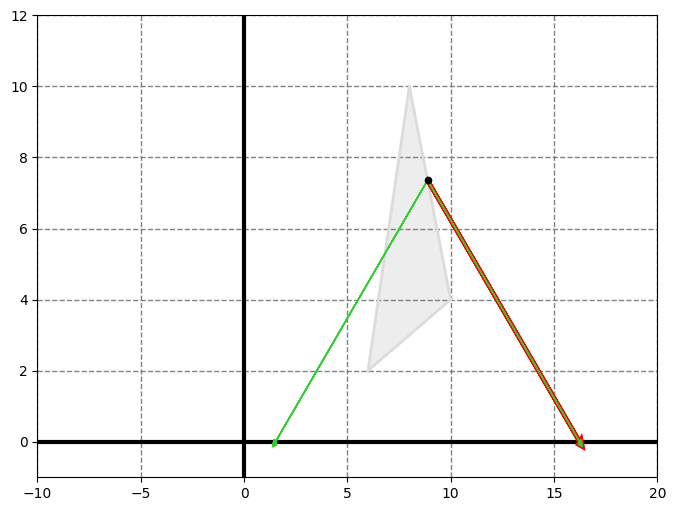

In [914]:
NUM_POINTS = 1
NUM_RAYS = 2

all_segments = []

triangles = [
            Triangle([[8, 10], [10, 4], [6, 2]]),
            #  Triangle([[4, 6], [4, 2], [0, 1]]),
            #  Triangle([[13, 2], [14, 1], [11, 2]])
            ]

for triangle in triangles:
  triangle.sample_points()
  triangle.generate_rays()
  check_rays(triangle)

graph(
  lambda: [triangle.plot() for triangle in triangles],
  lambda: [triangle.plot_points() for triangle in triangles],
  lambda: [triangle.plot_rays() for triangle in triangles]
)

what the fuck is this?? why are there two line segments on the right?? why is the left line segment green??????